In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Advertising.csv")
df["total_spent"] = df["TV"] + df["radio"] + df["newspaper"]

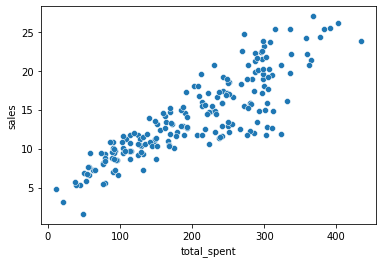

In [ ]:
sns.scatterplot(x="total_spent", y = "sales", data=df)

In [ ]:
x=df["total_spent"]
y=df["sales"]
np.polyfit(x,y,deg=1)

array([0.04868788, 4.24302822])

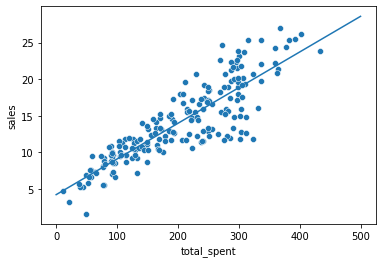

In [ ]:
potencial_spend = np.linspace(0,500,100)
#linear mx+b
predicted_sales = 0.04868788*potencial_spend + 4.24302822
sns.scatterplot(data=df, x="total_spent", y = "sales")
plt.plot(potencial_spend, predicted_sales)

# Scikit-Learn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
x = df.drop("sales", axis=1)
y = df["sales"]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
model = LinearRegression()
model.fit(x_train, y_train)
preds = model.predict(x_test)
test_residuals = y_test-preds

In [7]:
mean_absolute_error(y_test,preds)

1.1244750006255653

In [8]:
np.sqrt(mean_squared_error(y_test,preds))

1.43646052856369

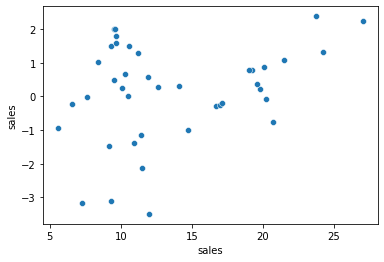

In [10]:
sns.scatterplot( x=y_test, y = test_residuals)

In [11]:
final_model = LinearRegression()
final_model.fit(x,y)

LinearRegression()

In [13]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [16]:
from joblib import dump, load
dump(final_model, "final_sales_model.joblib")

['final_sales_model.joblib']

# Polynomial Regression

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [20]:
x = df.drop("sales", axis=1)
y = df["sales"]

from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)
poly_conv.fit(x)

PolynomialFeatures(include_bias=False)

In [23]:
poly_features = poly_conv.transform(x)

In [24]:
poly_features = poly_conv.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, y_test = train_test_split(poly_features,y,test_size=0.2, random_state=101)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [27]:
preds = model.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(preds, y_test)
mse = mean_squared_error(preds, y_test)
rmse = np.sqrt(mse)
print(mae, rmse)

0.4431065831480033 0.5809450952903216


In [35]:
train_errors = []
test_errors = []
#degrees
for d in range(1,10):
  poly_conv = PolynomialFeatures(degree=d, include_bias=False)
  poly_features = poly_conv.fit_transform(x)

  x_train, x_test, t_train, y_test = train_test_split(poly_features,y,test_size=0.2, random_state=101)
  model = LinearRegression()
  model.fit(x_train, y_train)
  
  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)

  train_errors.append(np.sqrt(mean_squared_error(train_pred, y_train)))
  test_errors.append(np.sqrt(mean_squared_error(test_pred, y_test)))

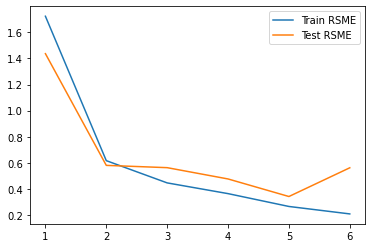

In [36]:
plt.plot(range(1,7), train_errors[:6], label="Train RSME")
plt.plot(range(1,7), test_errors[:6], label="Test RSME")
plt.legend()

In [38]:
final_poly_conv = PolynomialFeatures(degree=5, include_bias=False)
final_poly_features = poly_conv.fit_transform(x)

x_train, x_test, t_train, y_test = train_test_split(poly_features,y,test_size=0.2, random_state=101)
final_model = LinearRegression()
final_model.fit(x_train, y_train)

LinearRegression()

In [40]:
from joblib import dump
dump(final_model, "final_polynomial_linear_regression.joblib")

['final_polynomial_linear_regression.joblib']

# Feature scaling and cross validation


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
df = pd.read_csv("Advertising.csv")
x = df.drop("sales", axis=1)
y = df["sales"] 

poly_conv = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly_conv.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(poly_features,y, train_size=0.3, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#only to the training set
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [54]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)
preds = ridge_model.predict(x_test)

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(mae, rmse)

0.454409565928778 0.7207181124107106


In [57]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring = "neg_mean_absolute_error")
ridge_cv_model.fit(x_train, y_train)
ridge_cv_model.alpha_

0.1

In [56]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [58]:
preds = ridge_cv_model.predict(x_test)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(mae, rmse)

0.4544095659378202 0.7207181124140103


# LASSO L1

In [64]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)
#lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5)
lasso_cv_model.fit(x_train, y_train)
lasso_cv_model.alpha_

0.0007319897249431317

In [65]:
preds = lasso_cv_model.predict(x_test)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(mae, rmse)

0.38894222605415807 0.6543015356268566


In [66]:
lasso_cv_model.coef_

array([ 6.21221982,  0.90441352,  0.86023888, -7.8596773 ,  4.00004635,
       -0.95927852, -0.9586344 , -0.7487898 , -0.62690101,  3.61231526,
       -0.88084366,  0.39403346, -0.13825713,  0.48016075,  0.07591494,
        0.81298074, -0.14900199, -0.        ,  0.53956098])

# Elastic Net

In [75]:
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
#elastic_model = ElasticNet(l1_ratio = [.1, .5, .7, .9, .95, .99, 1], eps=1e-3, n_alphas=100, max_iter= 1000000)
elastic_model = ElasticNet(l1_ratio = 1, alpha=0)
elastic_model.fit(x_test, y_test)
#elastic_model.l1_ratio_

<ipython-input-75-03f38fc19527>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elastic_model.fit(x_test, y_test)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e+01, tolerance: 4.001e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0, l1_ratio=1)

In [76]:
preds = elastic_model.predict(x_test)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(mae, rmse)

0.3439516131144149 0.5087494156963626
